#09.10.2022

Here we are apply a K means cluster algorithm for Textails sales data.


In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


In [2]:
data = pd.read_csv("D:/Events/Python/Datasets/Textails_salesdata.csv")
data.head()

,Domain,SKU,SKU's Unique Group ID,Sku's Unique group Id Definition,Customer ID,brand Name,Type,Art style,Product style,Added to Cart Date,...,SleeveLength,Waist Type,Blouse Type,Blouse Length,Blouse Pattern,Blouse NeckStyle,Blouse BrassierSize,Blouse Front NeckDesign,Blouse back NeckDesign,Blouse SleeveDesign
0,Global site,SLSSITAI1001,SL,Salwar Kameez,582222,Market,Churidar Suit,Embroidered |,NaN,1-Mar-19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Global site,KDSLP8113,KDG,Girls,620497,Market,Girls Skirt Set,Beads | Embroidered | Stones |,NaN,1-Mar-19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Global site,GHSMV6512,GH,Lehengas,620497,Market,Fish Cut Lehenga,NaN,NaN,1-Mar-19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Global site,KRSVFKU277,KR,Kurtis,348096,Market,Long Kurti,Embroidered |,NaN,1-Mar-19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Global site,KRSVFKU265,KR,Kurtis,348096,Market,Long Kurti,Embroidered |,NaN,1-Mar-19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61931 entries, 0 to 61930
Data columns (total 39 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Domain                              61931 non-null  object 
 1   SKU                                 61931 non-null  object 
 2   SKU's Unique Group ID               61931 non-null  object 
 3   Sku's Unique group Id Definition    61931 non-null  object 
 4   Customer ID                         61931 non-null  int64  
 5   brand Name                          61931 non-null  object 
 6   Type                                61931 non-null  object 
 7   Art style                           56198 non-null  object 
 8   Product style                       13508 non-null  object 
 9   Added to Cart Date                  61931 non-null  object 
 10  Added to Cart Time                  61931 non-null  object 
 11  Purchased Date                      23693

In [4]:
data.isnull().sum()

Domain                                    0
SKU                                       0
SKU's Unique Group ID                     0
Sku's Unique group Id Definition          0
Customer ID                               0
brand Name                                0
Type                                      0
Art style                              5733
Product style                         48423
Added to Cart Date                        0
Added to Cart Time                        0
Purchased Date                        38238
RFM Value                             21069
Body height                           52811
Readymade /kids /Bust size            19551
Customer Last Purchased Date          21050
Customer Last website Visited date    22055
Customer Registered Date                  0
Customer Name                             0
City                                  17254
State                                 18062
Country                               13718
Waist To Floor size             

In [5]:
#Before applying a drop method we have to take a copy of original data
data_copy = data.copy()

There are a greater number of columns with null values in the dataset. We must remove the unnecessary columns from the datasets.

In [6]:
data.drop(['Waist To Floor size','Front Neck Style','Back Neck Style','Sleeve Style', 'Kameez Style', 'SleeveLength', 'Waist Type', 'Blouse Type', 'Blouse Length', 'Blouse Pattern', 'Blouse BrassierSize', 'Blouse NeckStyle', 'Blouse Front NeckDesign', 'Blouse back NeckDesign', 'Blouse SleeveDesign','Pant Style','KameezLength'],axis=1,inplace=True)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61931 entries, 0 to 61930
Data columns (total 22 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Domain                              61931 non-null  object 
 1   SKU                                 61931 non-null  object 
 2   SKU's Unique Group ID               61931 non-null  object 
 3   Sku's Unique group Id Definition    61931 non-null  object 
 4   Customer ID                         61931 non-null  int64  
 5   brand Name                          61931 non-null  object 
 6   Type                                61931 non-null  object 
 7   Art style                           56198 non-null  object 
 8   Product style                       13508 non-null  object 
 9   Added to Cart Date                  61931 non-null  object 
 10  Added to Cart Time                  61931 non-null  object 
 11  Purchased Date                      23693

In [8]:
data.head()

,Domain,SKU,SKU's Unique Group ID,Sku's Unique group Id Definition,Customer ID,brand Name,Type,Art style,Product style,Added to Cart Date,...,RFM Value,Body height,Readymade /kids /Bust size,Customer Last Purchased Date,Customer Last website Visited date,Customer Registered Date,Customer Name,City,State,Country
0,Global site,SLSSITAI1001,SL,Salwar Kameez,582222,Market,Churidar Suit,Embroidered |,NaN,1-Mar-19,...,NaN,NaN,34,NaN,NaN,18-Jul-18,Jannat,NaN,NaN,United States
1,Global site,KDSLP8113,KDG,Girls,620497,Market,Girls Skirt Set,Beads | Embroidered | Stones |,NaN,1-Mar-19,...,NaN,NaN,8 TO 10 YRS,NaN,NaN,1-Mar-19,minchi1162,NaN,NaN,NaN
2,Global site,GHSMV6512,GH,Lehengas,620497,Market,Fish Cut Lehenga,NaN,NaN,1-Mar-19,...,NaN,NaN,NaN,NaN,NaN,1-Mar-19,minchi1162,NaN,NaN,NaN
3,Global site,KRSVFKU277,KR,Kurtis,348096,Market,Long Kurti,Embroidered |,NaN,1-Mar-19,...,LOS,NaN,S (Small),24-Jan-15,24-Jun-19,24-Jan-15,Rukshana Jalil,Ozone Park,New York,United States
4,Global site,KRSVFKU265,KR,Kurtis,348096,Market,Long Kurti,Embroidered |,NaN,1-Mar-19,...,LOS,NaN,S (Small),24-Jan-15,24-Jun-19,24-Jan-15,Rukshana Jalil,Ozone Park,New York,United States


In [9]:
data.dropna(inplace=True)

In [10]:
data_num = data[["Customer ID","Body height"]]
data_cat = data.drop(["Customer ID","Body height"],axis=1)

In [11]:
# data_cat.fillna('',inplace=True)
# median = data_num["Body height"].median()
# data_num["Body height"].fillna(median,inplace=True)

In [12]:
data_cat.isnull().sum()

Domain                                0
SKU                                   0
SKU's Unique Group ID                 0
Sku's Unique group Id Definition      0
brand Name                            0
Type                                  0
Art style                             0
Product style                         0
Added to Cart Date                    0
Added to Cart Time                    0
Purchased Date                        0
RFM Value                             0
Readymade /kids /Bust size            0
Customer Last Purchased Date          0
Customer Last website Visited date    0
Customer Registered Date              0
Customer Name                         0
City                                  0
State                                 0
Country                               0
dtype: int64

In [13]:
data_num.isnull().sum()

Customer ID    0
Body height    0
dtype: int64

In [14]:
# StandardScaler method apply for the numerical values 
scaler = StandardScaler()
scaler_data = scaler.fit_transform(data_num)

In [15]:
scaler_data

array([[ 0.32360015,  0.09396167],
       [ 0.64659435,  0.09396167],
       [ 0.76398525,  0.2501462 ],
       ...,
       [ 0.95362228, -0.01016134],
       [ 0.95362228, -4.69569709],
       [ 0.95362228, -0.01016134]])

One-hot encoding is the process by which categorical data are converted into numerical data for use in machine learning.

Categorical features are turned into binary features that are one-hot encoded, meaning that if a feature is represented by that column, it receives a 1. Otherwise, it receives a 0.

In [16]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
data_cat_1hot = cat_encoder.fit_transform(data_cat)

In [17]:
data_cat_1hot

<2116x7336 sparse matrix of type '<class 'numpy.float64'>'
	with 42320 stored elements in Compressed Sparse Row format>

In [18]:
from sklearn.pipeline import Pipeline

num_pipeline = Pipeline([
    ('std_scaler',StandardScaler()),
])

data_num_pipe = num_pipeline.fit_transform(data_num)

In [19]:
from sklearn.compose import ColumnTransformer

num_attribute = list(data_num)
cat_attribute = list(data_cat)
cat_attribute

['Domain',
 'SKU ',
 "SKU's Unique Group ID",
 "Sku's Unique group Id Definition",
 'brand Name',
 'Type',
 'Art style',
 'Product style',
 'Added to Cart Date',
 'Added to Cart Time',
 'Purchased Date',
 'RFM Value',
 'Readymade /kids /Bust size',
 'Customer Last Purchased Date',
 'Customer Last website Visited date',
 'Customer Registered Date',
 'Customer Name',
 'City',
 'State',
 'Country']

In [20]:
full_pipeline = ColumnTransformer([
    ("numerical",num_pipeline,num_attribute),
    ("categorical",OneHotEncoder(),cat_attribute)
])
full_pipeline

ColumnTransformer(transformers=[('numerical',
                                 Pipeline(steps=[('std_scaler',
                                                  StandardScaler())]),
                                 ['Customer ID', 'Body height']),
                                ('categorical', OneHotEncoder(),
                                 ['Domain', 'SKU ', "SKU's Unique Group ID",
                                  "Sku's Unique group Id Definition",
                                  'brand Name', 'Type', 'Art style',
                                  'Product style', 'Added to Cart Date',
                                  'Added to Cart Time', 'Purchased Date',
                                  'RFM Value', 'Readymade /kids /Bust size',
                                  'Customer Last Purchased Date',
                                  'Customer Last website Visited date',
                                  'Customer Registered Date', 'Customer Name',
                                  'City', 'State', 'Country'])])

Now we can prepare the data using full pipeline method.The Dataset have a both categorical and numerical values,the pipeline method convered data into sparse matrix

**Sparse matrix similar to the normal matrix but it have contains more number of zeros**

In [21]:
data_prepared = full_pipeline.fit_transform(data)

In [22]:
data_prepared

<2116x7338 sparse matrix of type '<class 'numpy.float64'>'
	with 46552 stored elements in Compressed Sparse Row format>

In [23]:
kmeans = KMeans(n_clusters=3)
k=kmeans.fit(data_prepared)

In [24]:
k.labels_

array([2, 2, 2, ..., 2, 1, 2])

In [25]:
len(k.labels_)

2116

In [26]:
k.cluster_centers_

array([[-1.19433463e+00,  1.84065420e-01,  2.30040595e-02, ...,
         0.00000000e+00,  9.60757781e-02,  7.55074425e-01],
       [ 3.38620866e-02, -4.71898776e+00,  0.00000000e+00, ...,
         0.00000000e+00,  1.18421053e-01,  7.23684211e-01],
       [ 6.76433340e-01,  1.71113547e-01,  1.61414297e-02, ...,
         3.07455803e-03,  1.21445042e-01,  6.81014604e-01]])

In [27]:
len(k.cluster_centers_)

3

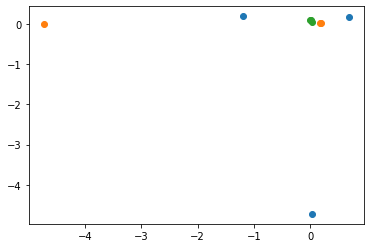

In [28]:
for i in range(len(k.cluster_centers_)):
    plt.scatter(k.cluster_centers_[:,i],k.cluster_centers_[:,i+1])

In [29]:
label = k.labels_

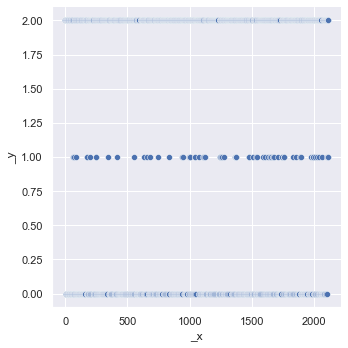

In [30]:
import seaborn as sns

sns.set_theme()

sns.relplot(data=label)
plt.show()

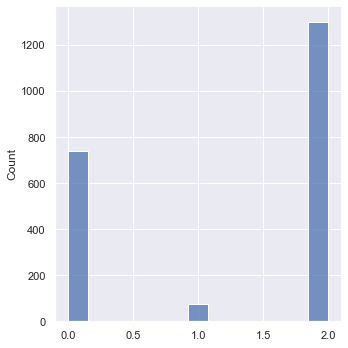

In [31]:
sns.displot(label)

In [32]:
#Simple method to convert the Array into Dataframe
lable_data= pd.DataFrame(label) 

In [33]:
lable_data.value_counts()

2    1301
0     739
1      76
dtype: int64

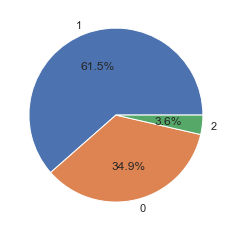

In [34]:
plt.pie(lable_data.value_counts(),labels=(1,0,2), autopct='%1.1f%%')
plt.show()

The K means cluster algorithm was separeated/clustered the given data into 3 type of group (0,1,2).
